# Developmental and genetics roots of laminar thickness covariance

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')


DATA_DIR = '../data/'
OUTPUT_DIR = '../output/'
SRC_DIR = '../src/'

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


# 1. Inter-regional genetic and environmental correlation

Genetic correlation

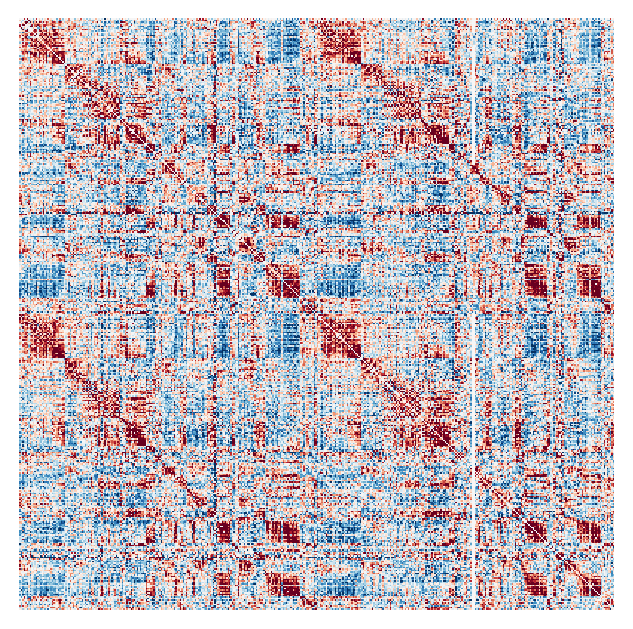

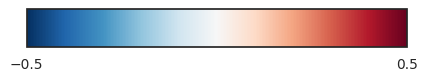

In [2]:
gene_corr = matrices.GeneticCorrelationMatrix()
helpers.plot_matrix(gene_corr.matrix.values, cmap=gene_corr.cmap, vrange_value=(-0.5, 0.5))

Correlation of LTC with structural covariance matrix:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Genetic correlation
Coef: 0.2983859326230832; p-value (spin): 0.0


(0.2983859326230832, 0.0)

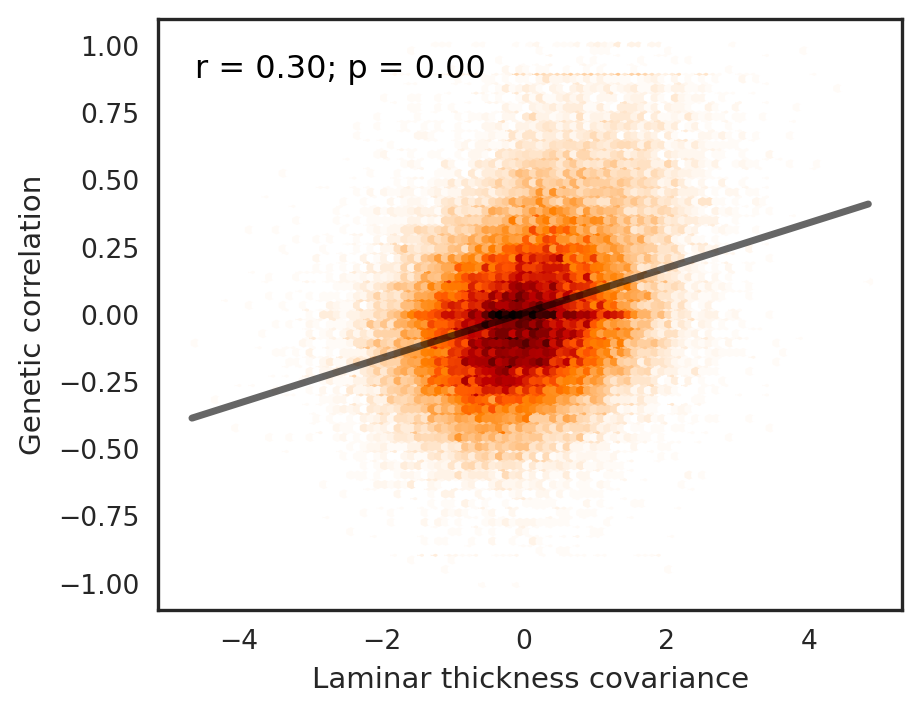

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
ltc.correlate_edge_wise(gene_corr, n_perm=1000, axis_off=False, figsize=(5,4))

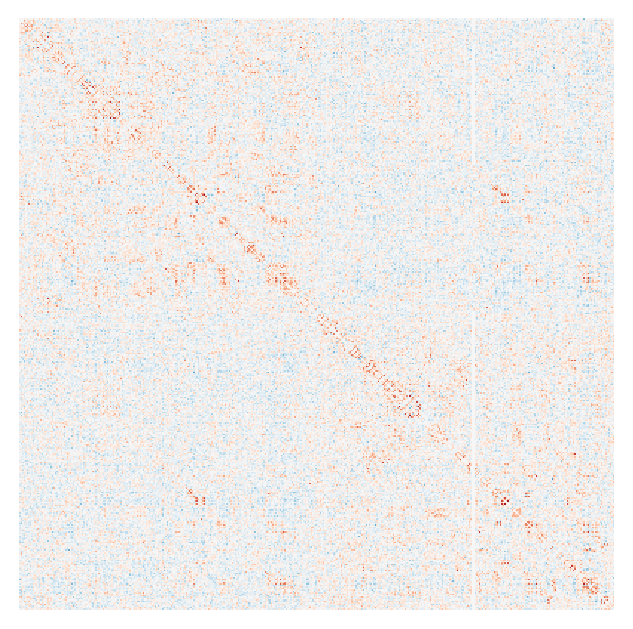

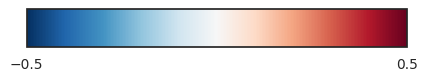

In [4]:
env_corr = matrices.EnvironmentalCorrelationMatrix()
helpers.plot_matrix(env_corr.matrix.values, cmap=env_corr.cmap, vrange_value=(-0.5, 0.5))

Pearson correlation with Environmental correlation
Coef: 0.11018145630285114; p-value (spin): 0.008


(0.11018145630285114, 0.008)

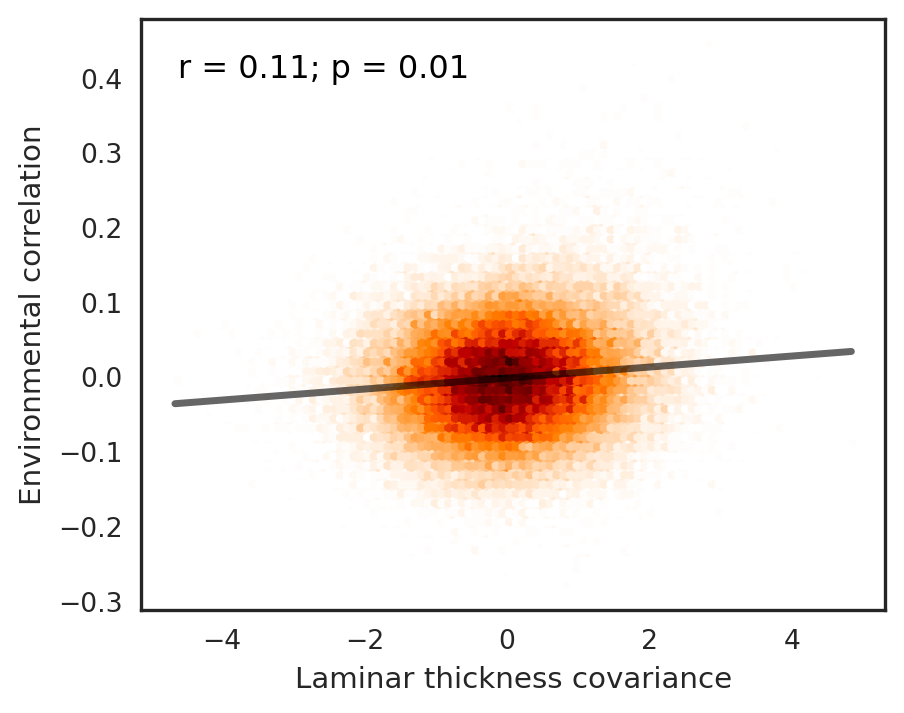

In [5]:
ltc.correlate_edge_wise(env_corr, n_perm=1000, axis_off=False, figsize=(5,4))

# 2. Correlated gene expression

In [6]:
ahba_df = datasets.fetch_ahba_data(
    parcellation_name='sjh', 
    ibf_threshold=0.5, missing='centroids')['all']

In [7]:
ahba_df.values

array([[0.43602819, 0.33954783, 0.73422776, ..., 0.63560811, 0.48706864,
        0.49239623],
       [0.32072013, 0.59757129, 0.43905232, ..., 0.65544361, 0.59903272,
        0.30084342],
       [0.24763828, 0.40079039, 0.66342403, ..., 0.50404618, 0.68470112,
        0.39151609],
       ...,
       [0.99485424, 0.54442924, 0.231476  , ..., 0.34052586, 0.99475642,
        1.        ],
       [0.62429089, 0.71923742, 0.48622195, ..., 0.40780962, 0.43267081,
        0.58342601],
       [0.6265066 , 0.50747192, 0.41026293, ..., 0.41765043, 0.46847976,
        0.6977963 ]])

(0.0, 503.0, 15631.0, 0.0)

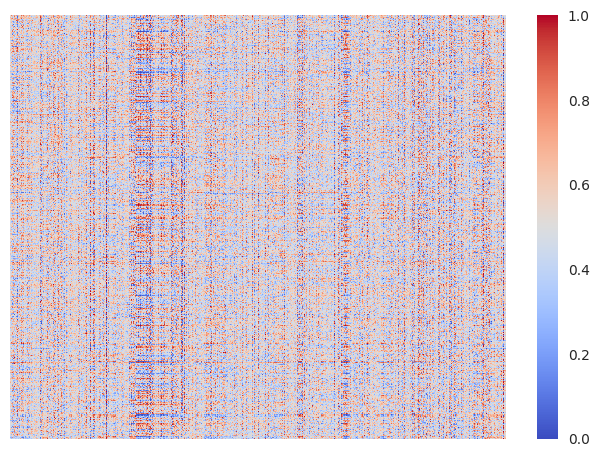

In [8]:
ax = sns.heatmap(ahba_df.values.T, cmap='coolwarm', cbar=False)
ax.axis('off')

CGE matrix:

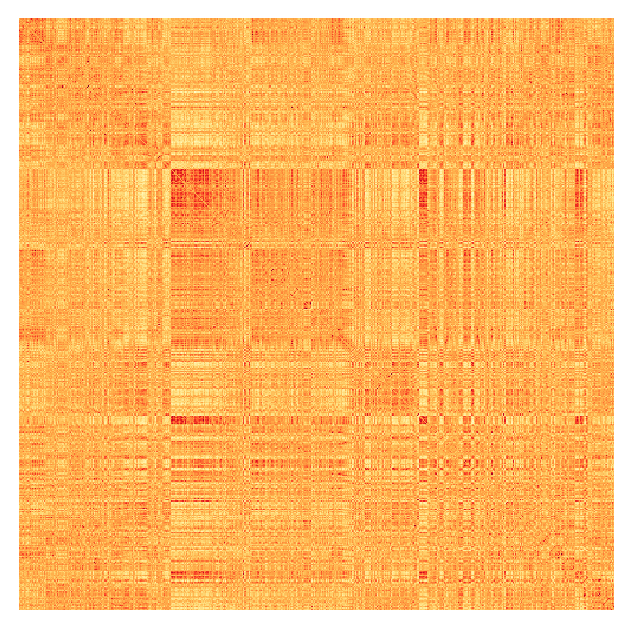

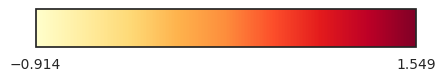

In [9]:
cge = matrices.CorrelatedGeneExpressionMatrix('sjh', brain_specific=False)
cge.plot(vrange=(0, 1))

Correlation of LTC with CGE:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Pearson correlation with Correlated gene expression
Coef: 0.2034277805825808; p-value (spin): 0.01


(0.2034277805825808, 0.01)

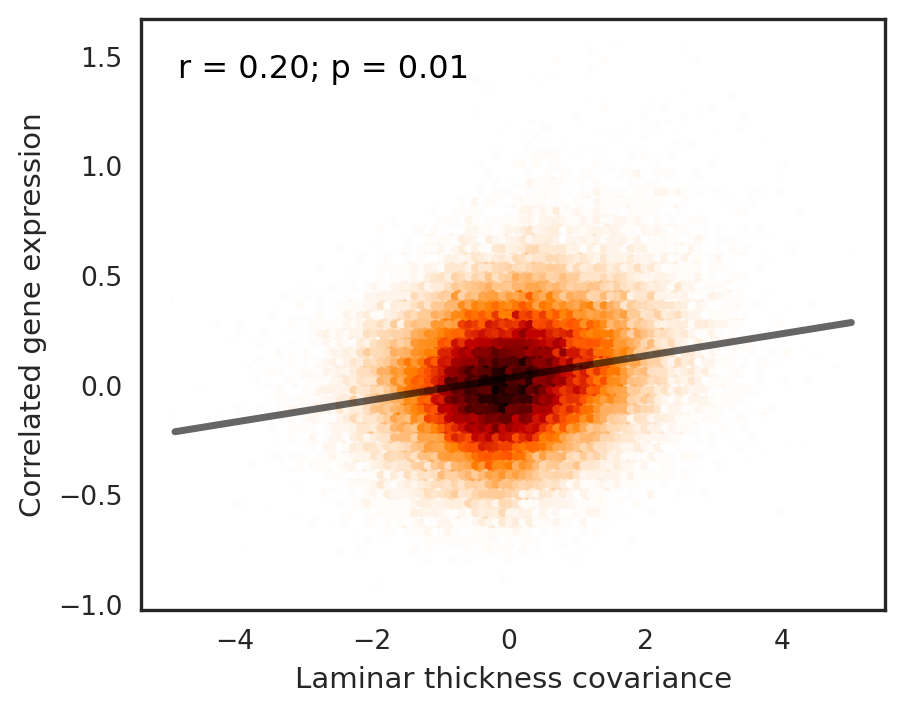

In [10]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh')
ltc.correlate_edge_wise(cge, axis_off=False, figsize=(5,4))